In [2]:
import numpy as np
from skimage import io, data
from skimage.io import imread
from skimage.color import rgb2gray
from matplotlib.pyplot import figure, imshow, title, subplot,show
from skimage import io
import numpy as np
from numpy.fft import ifft2, fft2
import matplotlib.pyplot as plt

In [19]:
img = io.imread('lena.png')

In [20]:
def dft(img):
    Fimg = fft2(img)
    return Fimg


In [21]:
def dftCenter(img):
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = img[i,j] * (-1)**(i+j)
    return dft(img)

In [22]:
def idft(G):
    img = ifft2(G)
    img = np.real(img)
    img = img / np.max(img)
    img = img * 255
    img = img.astype(np.uint8)
    return img

In [23]:
def idftCenter(G):
    G = idft(G.copy())
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            G[i,j] = G[i,j] * (-1)**(i+j)
    return G

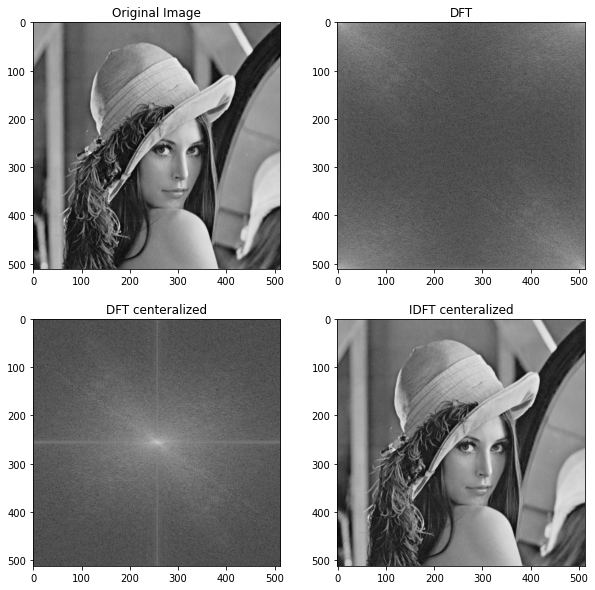

In [24]:
figure(figsize=(10,10))
subplot(2,2,1)
imshow(img, cmap='gray')
title('Original Image')
subplot(2,2,2)
Fimg = dft(img.copy())
Fimg = np.abs(Fimg)
Fimg = np.log(Fimg + 1)
Fimg = Fimg / np.max(Fimg)
Fimg = Fimg * 255
Fimg = Fimg.astype(np.uint8)
title('DFT')
imshow(Fimg, cmap='gray')
Fimg = dftCenter(img.copy())
k = Fimg.copy()
Fimg = np.abs(Fimg)
Fimg = np.log(Fimg + 1)
Fimg = Fimg / np.max(Fimg)
Fimg = Fimg * 255
Fimg = Fimg.astype(np.uint8)
subplot(2,2,3)
title('DFT centeralized')
imshow(Fimg, cmap='gray')
Fimg = idftCenter(k)
subplot(2,2,4)
title('IDFT centeralized')
imshow(Fimg, cmap='gray')
show()

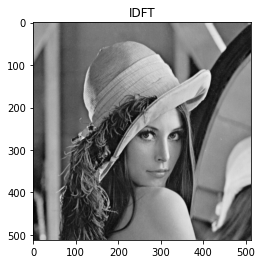

In [25]:
img2 = idft(dftCenter(img.copy()))
figure
title('IDFT')
imshow(img, cmap='gray')


In [26]:
def gaussianLowPass(img, Do):
    def H(u, v):
        return np.exp((- (((u*u) + (v*v))/(2 * Do**2)) ))
    F = dft(img)
    u,v = img.shape
    for i in range(u):
        for j in range(v):
            F[i,j] = F[i,j] * H(i, j)
    return idft(F)
def gaussianHighPass(img, Do):
    def H(u, v):
        return 1 - np.exp((- (((u*u) + (v*v))/(2 * Do**2)) ))
    F = dft(img)
    u,v = img.shape
    for i in range(u):
        for j in range(v):
            F[i,j] = F[i,j] * H(i, j)
    return idft(F)

def butterworthLowPass(img, Do, n):
    def H(u, v):
        return 1 / (1 + (((u*u) + (v*v))/(Do**2))**(n/2))
    F = dft(img)
    u,v = img.shape
    for i in range(u):
        for j in range(v):
            F[i,j] = F[i,j] * H(i, j)
    return idft(F)
def butterworthHighPass(img, Do, n):
    def H(u, v):
        return 1 / (1 + (Do**2)/(((u*u) + (v*v)))**(n/2))
    F = dft(img)
    u,v = img.shape
    for i in range(1,u):
        for j in range(1,v):
            F[i,j] = F[i,j] * H(i, j)
    return idft(F)


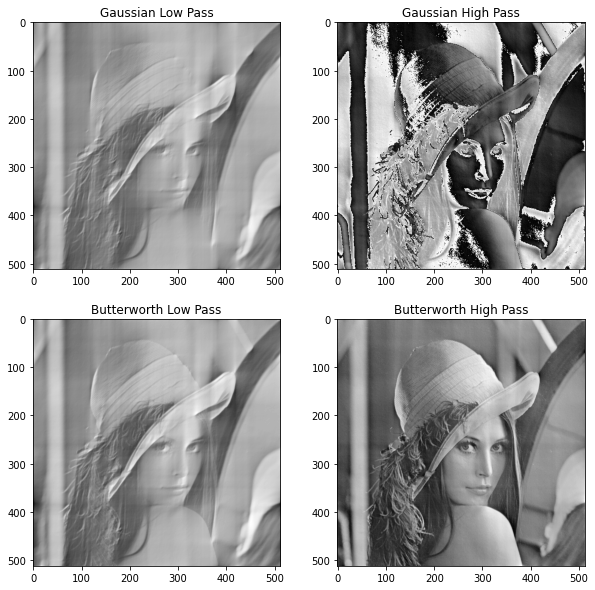

In [27]:

figure(figsize=(10,10))
subplot(2,2,1)
title('Gaussian Low Pass')
imshow(gaussianLowPass(img, 150), cmap='gray')
subplot(2,2,2)
title('Gaussian High Pass')
imshow(gaussianHighPass(img, 150), cmap='gray')
subplot(2,2,3)
title('Butterworth Low Pass')
imshow(butterworthLowPass(img, 150, 2), cmap='gray')
subplot(2,2,4)
title('Butterworth High Pass')
imshow(butterworthHighPass(img, 150, 2), cmap='gray')
show()
